## Necessary Libraby and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
client_data = pd.read_csv("/client_data.csv")
price_data = pd.read_csv("/price_data.csv")


##Exploratory Data Analysis

Data types, missing values, and basic statistics:

In [ ]:
# Check data types
print(client_data.dtypes)

# Check for missing values
print(client_data.isna().sum())

# Basic statistics
print(client_data.describe())


In [6]:
# Check data types
print(price_data.dtypes)

# Check for missing values
print(price_data.isna().sum())

# Basic statistics
print(price_data.describe())

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object
id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64
       price_off_peak_var  price_peak_var  price_mid_peak_var  \
count        55075.000000    55075.000000        55075.000000   
mean             0.140722        0.054705            0.031543   
std              0.024472        0.050155            0.036518   
min              0.000000        0.000000            0.000000   
25%              0.125748        0.000000            0.000000   
50%              0.145509        0.085483            0.000000   
75%              0.151367        0.102232            0.072846   
max              0.28

Visualize distributions of key variables

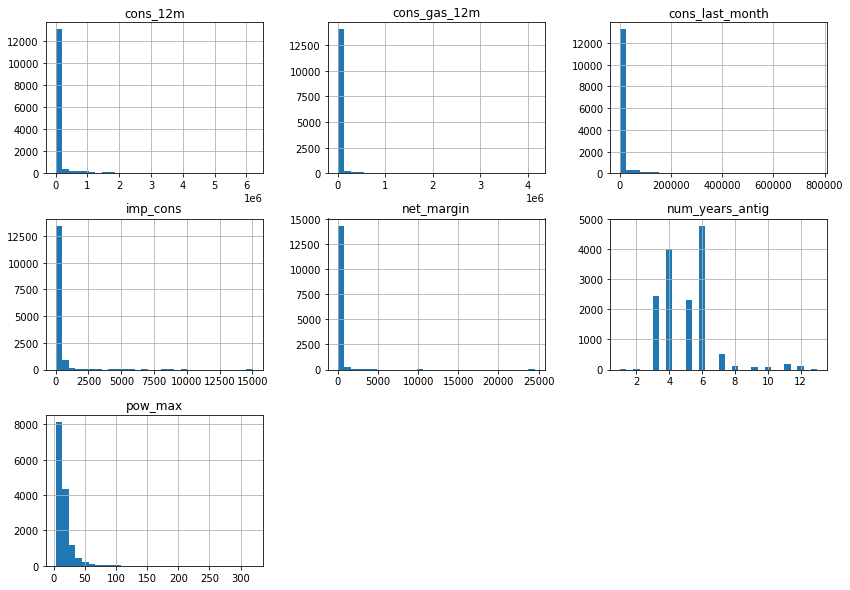

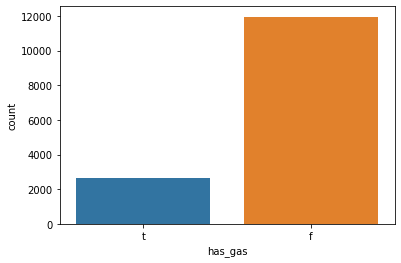

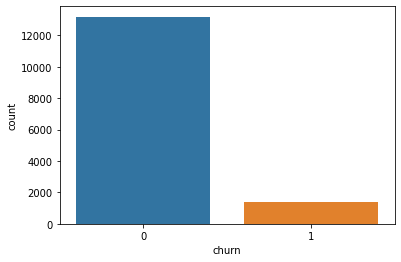

In [7]:
# Histograms for continuous variables
client_data[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'net_margin', 'num_years_antig', 'pow_max']].hist(figsize=(14, 10), bins=30)
plt.show()

# Bar plots for categorical variables
sns.countplot(x='has_gas', data=client_data)
plt.show()

sns.countplot(x='churn', data=client_data)
plt.show()


In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

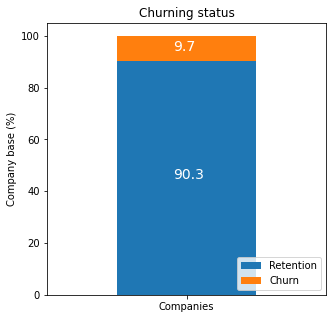

In [9]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Analyze price sensitivity



In [17]:
# Merge client_data and price_data
data = client_data.merge(price_data, on='id', how='inner')

# Calculate average prices and price sensitivity index, handling division by zero
data['avg_price_var'] = (data['price_off_peak_var'] + data['price_peak_var'] + data['price_mid_peak_var']) / 3
data['avg_price_fix'] = (data['price_off_peak_fix'] + data['price_peak_fix'] + data['price_mid_peak_fix']) / 3
data['price_sensitivity'] = np.where(data['avg_price_fix'] != 0, data['avg_price_var'] / data['avg_price_fix'], np.nan)

# Drop rows with missing or infinite values in the 'price_sensitivity' column
data_clean = data.dropna(subset=['price_sensitivity']).replace([np.inf, -np.inf], np.nan).dropna(subset=['price_sensitivity'])

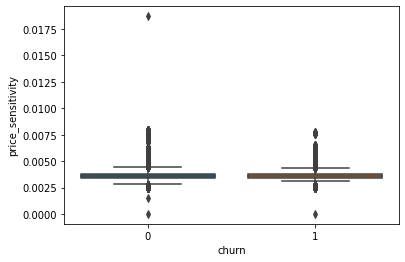

Correlation between price sensitivity and churn: -0.029101035857668368


In [18]:
# Visualize the relationship between price sensitivity and churn
sns.boxplot(x='churn', y='price_sensitivity', data=data_clean)
plt.show()

# Calculate correlation between price sensitivity and churn
correlation_clean = data_clean['price_sensitivity'].corr(data_clean['churn'])
print(f"Correlation between price sensitivity and churn: {correlation_clean}")
